In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from mpmath import mp
mp.pretty = 1

from ComCheb import mpRemez,Contours

In [113]:
m = 6


gamma = Contours.mpHypocycloid(m)
N     = np.arange(5,205,5)
#W     = np.zeros(len(N),dtype='O')

In [114]:
mp.dps = 50
prec=1e-5
for k in range(len(N)):
    if abs(W[k])>0:
        continue
    t1 = time()
    n = N[k]
    W[k] = mpRemez(gamma,n,symmetry=m,Mmax=1000,prec = prec,reps=20,plot=False,pinfo=False)[3]
    prec = float(min(1e-5,(W[k]-1)/100))
    print(n,'\t',prec,'\t',time()-t1)
    

5 	 1e-05 	 0.32364583015441895
10 	 1e-05 	 4.416585206985474
15 	 1e-05 	 25.4467830657959
20 	 1e-05 	 44.7815899848938
25 	 1e-05 	 152.86804628372192
30 	 1e-05 	 175.10124230384827
35 	 1e-05 	 245.31394791603088
40 	 1e-05 	 204.7328746318817
45 	 1e-05 	 446.5593042373657
50 	 1e-05 	 297.12912154197693
55 	 1e-05 	 310.41912317276
60 	 1e-05 	 270.7229723930359
65 	 1e-05 	 350.89000821113586
70 	 1e-05 	 387.32804822921753
75 	 1e-05 	 464.1652820110321
80 	 1e-05 	 2827.8073353767395
85 	 1e-05 	 357.0534875392914
90 	 1e-05 	 347.911336183548
95 	 1e-05 	 392.62049889564514
100 	 1e-05 	 369.05698251724243
105 	 1e-05 	 150144.8837120533
110 	 1e-05 	 526.4846017360687
115 	 1e-05 	 667.3130333423615
120 	 1e-05 	 527.8144955635071
125 	 1e-05 	 593.0505208969116
130 	 1e-05 	 601.2264006137848
135 	 1e-05 	 2612.374837875366
140 	 1e-05 	 3460.9297440052032
145 	 1e-05 	 1129.717877626419
150 	 1e-05 	 11320.545547246933
155 	 1e-05 	 985.0195016860962
160 	 1e-05 	 1021.7

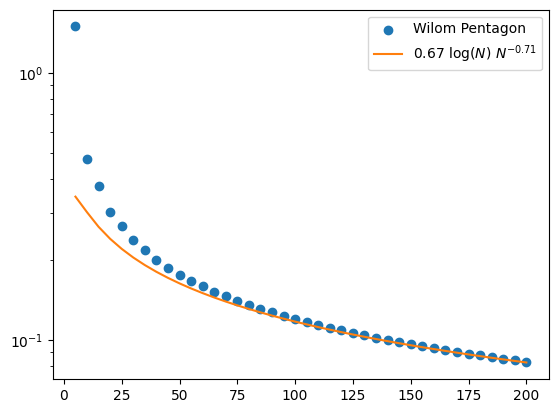

In [133]:
K = sum(W>0)
N1 = N[0:K]
W1 = W[0:K]-1
log = np.vectorize(mp.log)
mat = mp.matrix

a   = round(float(mp.lu_solve(mat(log(N1[1:]/N1[:-1])),mat(log(W1[:-1]/W1[1:])))[0]),2)
c   = round(float(mp.lu_solve(mat(N1**-a),W1/log(N1))[0]),2)

a   = 0.71
c   = 0.67

plt.scatter(N1,W1,c='C0',label = 'Wilom Pentagon')
plt.plot(N1,c*log(N1)/N1**a,c='C1',label=r'$'+str(c)+r'\ \log(N)\ N^{-'+str(a)+r'}$')
plt.yscale('log')
plt.legend()


In [111]:
np.round((log(W1[:-1]/W1[1:])/log(N1[1:]/N1[:-1])).astype(float),2)

array([1.65, 0.58, 0.76, 0.55, 0.65, 0.58, 0.59, 0.58, 0.57, 0.57, 0.56,
       0.56, 0.55, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.54, 0.54, 0.53])

In [81]:
mp.qr_solve(mat(log(N1[1:]/N1[:-1])),mat(log(W1[:-1]/W1[1:])))

([1.14552426057016696648187345492], 0.503854204535437732854718414397)

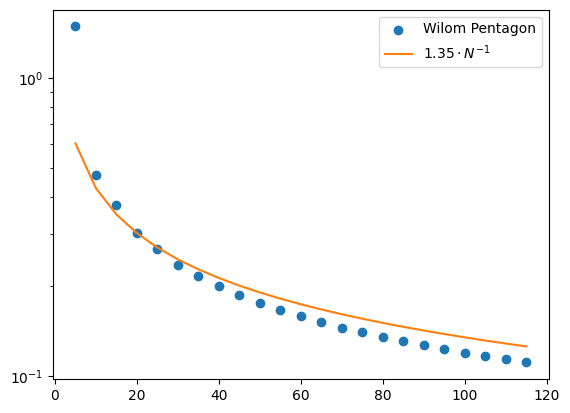

In [52]:
K = sum(W>0)

plt.scatter(N[:K],(W-1)[:K],c='C0',label = 'Wilom Pentagon')
plt.plot(N[:K],1.35/N[:K]**0.5,c='C1',label=r'$1.35\cdot N^{-1}$')
plt.yscale('log')
plt.legend()

np.int64(5)

                h_p       h_D  h_D increase  relative Error
Iteration                                                  
33         1.213509  1.213509  3.171413e-17    1.267772e-16
34         1.213509  1.213509  1.585706e-17    2.516073e-17
35         1.213509  1.213509  1.061014e-17    1.975575e-17
36         1.213509  1.213509  3.340908e-18    4.371678e-18
37         1.213509  1.213509  4.910404e-19    1.376549e-18
38         1.213509  1.213509  2.455202e-19    2.429759e-19
39         1.213509  1.213509  1.809656e-20    6.572526e-19
40         1.213509  1.213509  9.048280e-21    1.605850e-19
41         1.213509  1.213509  4.524136e-21    3.828213e-20
42         1.213509  1.213509  2.262074e-21    8.638486e-21


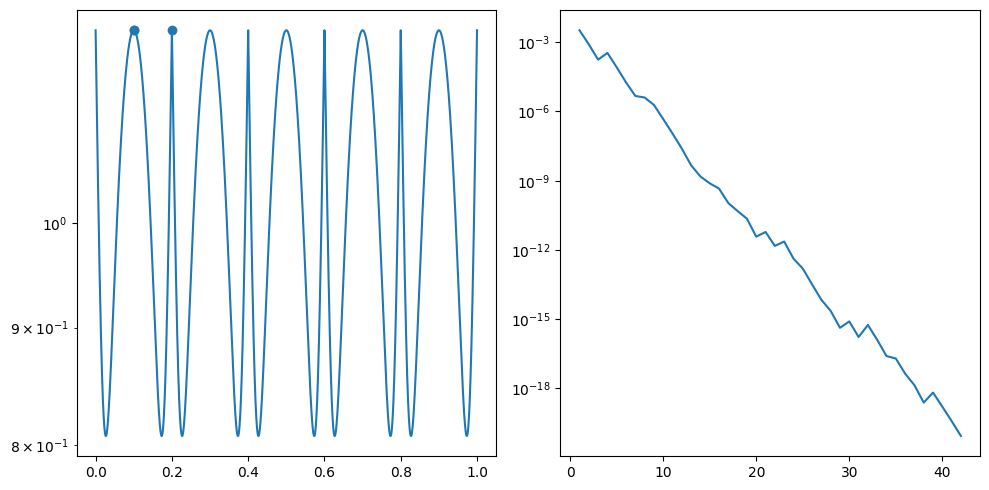

In [23]:
m = 5
#mpgamma = Contours.mpPolygon(m)

# Compute Chebyshev approximation of degree N
mp.dps=30
N = 5
mpt,mpa,mpL,mph,mpphi = mpRemez(gamma,N,symmetry=m,prec=1e-20,reps=20)

In [5]:
mpRemez?

Signature:
mpRemez(
    gamma,
    N,
    t=None,
    a=None,
    symmetry=1,
    prec=1e-10,
    Mmax=100,
    samples=1001,
    reps=5,
    plot=True,
    pinfo=True,
)
Docstring:
Performs Tangs algorithm for the given contour.
Input:
------
    gamma    : function; it describes the wanted contour, it has to be able to handle numpy arrays.
    N        : integer; sets the order of the wanted Cheybshev polynomial.

Optional:
---------
    t        : 1D numpy array; sets initial reference for the Remez routine. If None, then t is
               choosen equidistantly.
    a        : 1D numpy array; sets the inital angles for the Renez routine. If None, then a is
               choosen randomly.
    symmetry : integer; describes the symmetry factor. (n-regular polygon has symm. factor of n)
    prec     : float; wanted threshold for tangs algorithm.
    Mmax     : integer; number of maximum iterations.
    samples  : integer; number of inital samples for computing maximum norm
    reps  